**Практика 1. Знакомство с данными для обнаружения вторжения**

# *1. Загрузка данных и анализ данных*

*1.1 Загрузка данных*

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка данных
url = 'https://raw.githubusercontent.com/HoaNP/NSL-KDD-DataSet/refs/heads/master/KDDTrain%2B.txt'
df = pd.read_csv(url, header=None)

In [ ]:
# Вывод первых 5 строк
print("Первые 5 строк данных:")
print(df.head())

Первые 5 строк данных:
   0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]


*1.2 Анализ структуры данных*

In [ ]:
# Информация о данных
print("\nИнформация о данных:")
print(df.info())

# Количество строк и столбцов
print(f"\nКоличество строк: {df.shape[0]}, столбцов: {df.shape[1]}")

# Проверка пропущенных значений
print("\nПропущенные значения:")
print(df.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  i

# *2. Визуализация данных*

*2.1 Гистограммы*

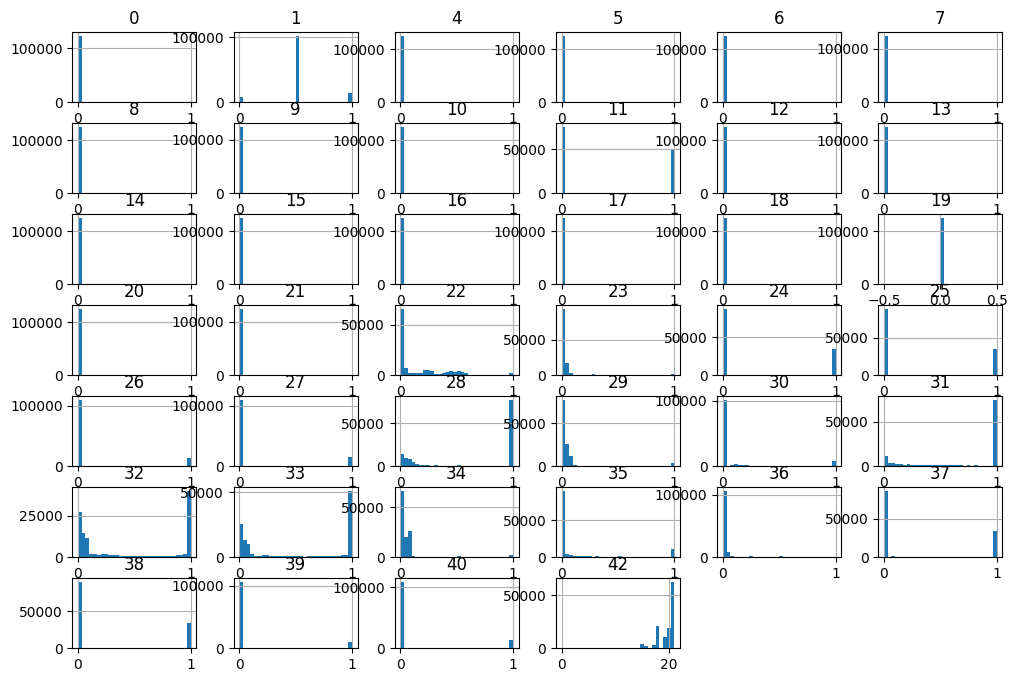

In [ ]:
# Гистограммы для числовых признаков
df.hist(figsize=(12, 8), bins=30)
plt.show()

*2.2 Диаграммы рассеяния*




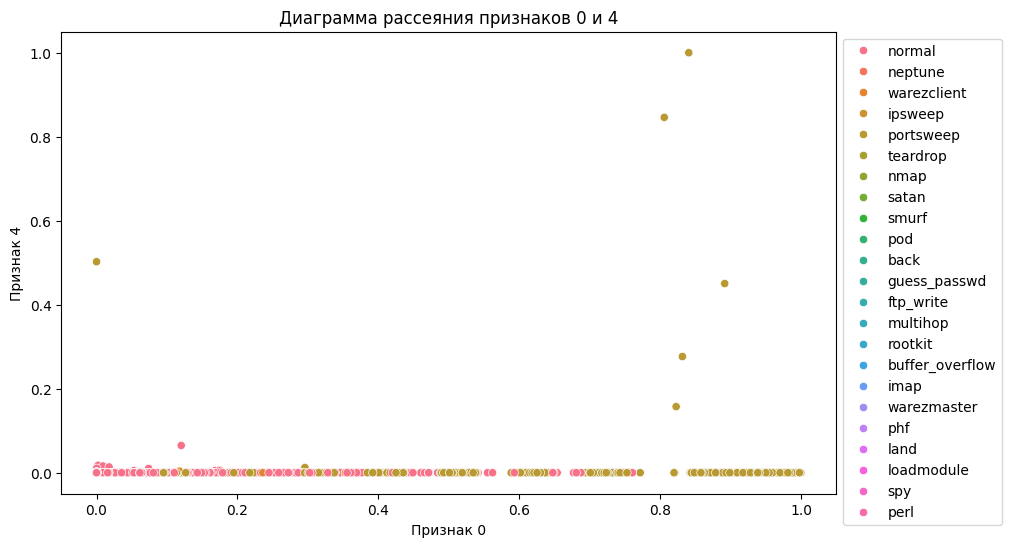

In [ ]:
# Диаграмма рассеяния для двух признаков
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[0], y=df[4], hue=df[41])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Диаграмма рассеяния признаков 0 и 4')
plt.xlabel('Признак 0')
plt.ylabel('Признак 4')
plt.show()

*3.3 Тепловая карта корреляций*

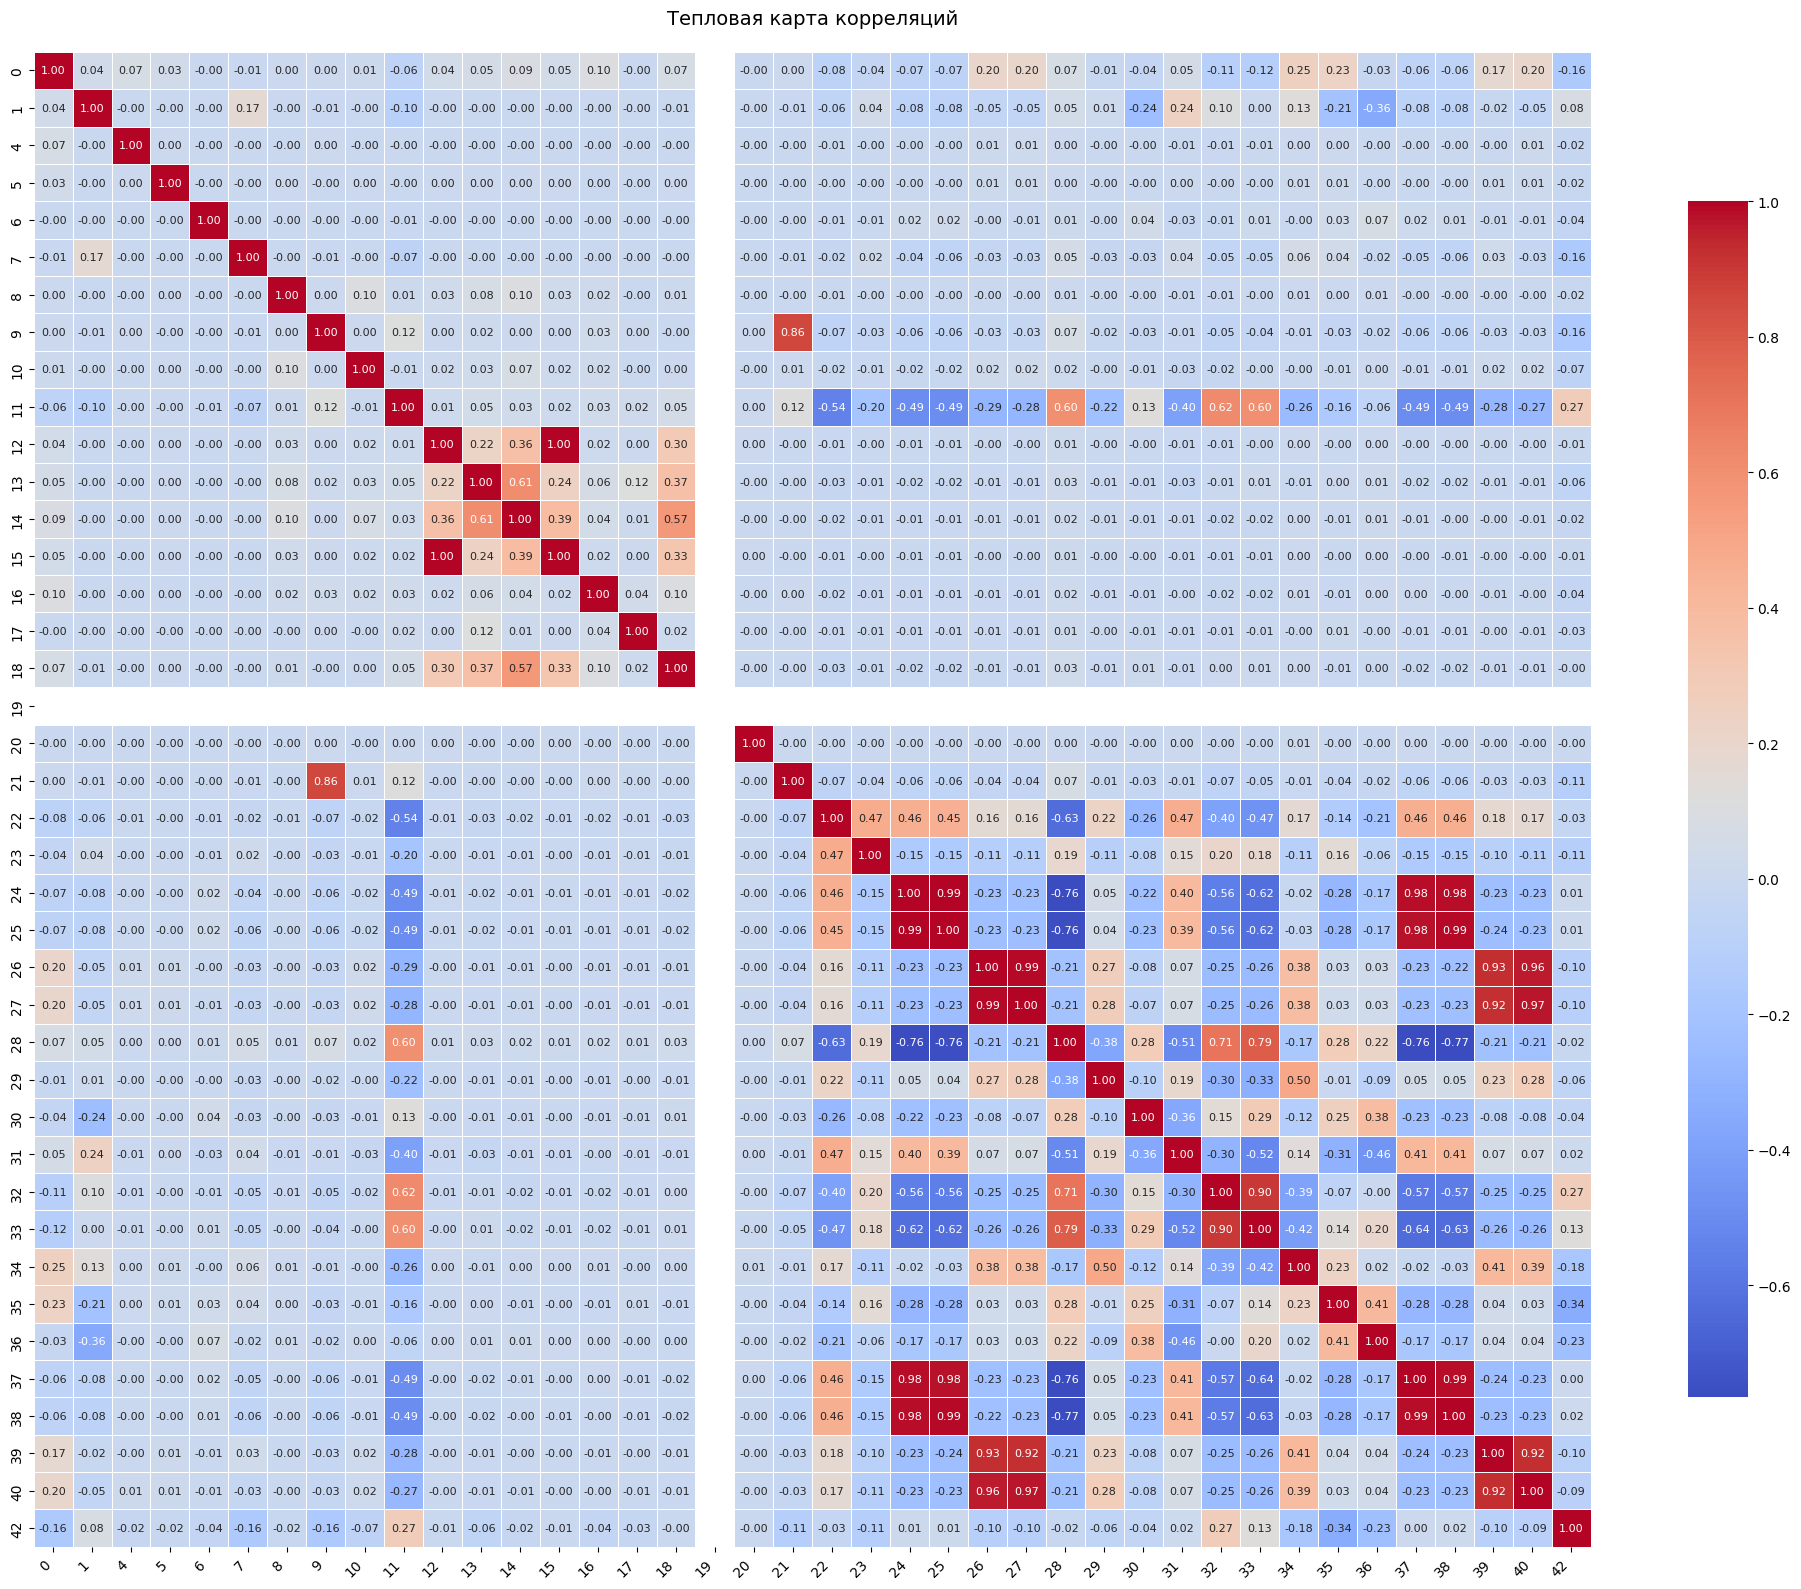

In [ ]:
plt.figure(figsize=(20, 16))

# Выбираем только числовые колонки
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Строим тепловую карту с настройками
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'size': 8},
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Тепловая карта корреляций', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)  # Размер шрифта оси Y
plt.tight_layout()
plt.show()

#*3. Предобработка данных*


*3.1 Обработка пропущенных значений*

In [ ]:
# Проверяем пропущенные значения
print("Пропущенные значения до обработки:")
print(df.isnull().sum())

Пропущенные значения до обработки:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64


*3.2 Кодирование категориальных признаков*

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding для протокола (столбец 1)
label_encoder = LabelEncoder()
df[1] = label_encoder.fit_transform(df[1])

# One-Hot Encoding для сервиса (столбец 2) и флагов (столбец 3)
df = pd.get_dummies(df, columns=[2, 3])

print("\nДанные после кодирования:")
print(df.head())


Данные после кодирования:
   0  1    4     5  6  7  8  9  10  11  ...  3_REJ  3_RSTO  3_RSTOS0  3_RSTR  \
0  0  1  491     0  0  0  0  0   0   0  ...  False   False     False   False   
1  0  2  146     0  0  0  0  0   0   0  ...  False   False     False   False   
2  0  1    0     0  0  0  0  0   0   0  ...  False   False     False   False   
3  0  1  232  8153  0  0  0  0   0   1  ...  False   False     False   False   
4  0  1  199   420  0  0  0  0   0   1  ...  False   False     False   False   

    3_S0   3_S1   3_S2   3_S3   3_SF   3_SH  
0  False  False  False  False   True  False  
1  False  False  False  False   True  False  
2   True  False  False  False  False  False  
3  False  False  False  False   True  False  
4  False  False  False  False   True  False  

[5 rows x 122 columns]


*3.3 Нормализация числовых данных*


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Выбираем только числовые столбцы
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Исключаем столбец с метками (последний столбец)
numeric_cols = numeric_cols[:-1]

# Применяем MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nДанные после нормализации:")
print(df.head())


Данные после нормализации:
     0    1             4             5    6    7    8    9   10   11  ...  \
0  0.0  0.5  3.558064e-07  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  1.0  1.057999e-07  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.5  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.5  1.681203e-07  6.223962e-06  0.0  0.0  0.0  0.0  0.0  1.0  ...   
4  0.0  0.5  1.442067e-07  3.206260e-07  0.0  0.0  0.0  0.0  0.0  1.0  ...   

   3_REJ  3_RSTO  3_RSTOS0  3_RSTR   3_S0   3_S1   3_S2   3_S3   3_SF   3_SH  
0  False   False     False   False  False  False  False  False   True  False  
1  False   False     False   False  False  False  False  False   True  False  
2  False   False     False   False   True  False  False  False  False  False  
3  False   False     False   False  False  False  False  False   True  False  
4  False   False     False   False  False  False  False  False   True  False  

[5 rows x 122 columns]


# *4. Балансировка классов*

=== Проверка исходных данных ===
Размер X: (125973, 121), размер y: (125973,)

Уникальные метки: [0 1]
Тип меток: int64

Метки после преобразования: [0 1]

Распределение ДО балансировки:
3_SH
0    125702
1       271
Name: count, dtype: int64

Выполняем балансировку...

=== Результаты балансировки ===
Размер после балансировки: (251404, 122)

Распределение ПОСЛЕ балансировки:
label
0    125702
1    125702
Name: count, dtype: int64


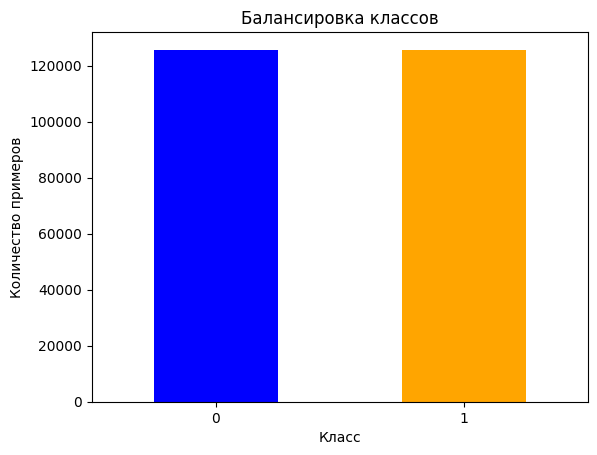


Результаты сохранены в balanced_data.csv


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Проверка исходных данных
print("=== Проверка исходных данных ===")
print(f"Размер X: {X.shape}, размер y: {y.shape}")
print("\nУникальные метки:", np.unique(y))
print("Тип меток:", y.dtype)

# 2. Преобразование меток в числовой формат
try:
    y = y.astype(int)
    print("\nМетки после преобразования:", np.unique(y))
except Exception as e:
    print("\nОшибка преобразования меток:", str(e))
    raise

# 3. Проверка распределения классов
class_dist = pd.Series(y).value_counts()
print("\nРаспределение ДО балансировки:")
print(class_dist)

if len(class_dist) < 2:
    raise ValueError("Требуется минимум 2 класса для балансировки!")

# 4. Балансировка с обработкой ошибок
try:
    print("\nВыполняем балансировку...")
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # 5. Создание сбалансированного датафрейма
    balanced_df = pd.DataFrame(X_resampled, columns=X.columns.astype(str))
    balanced_df = pd.concat([balanced_df, pd.Series(y_resampled, name='label')], axis=1)

    # Проверка результата
    print("\n=== Результаты балансировки ===")
    print("Размер после балансировки:", balanced_df.shape)
    print("\nРаспределение ПОСЛЕ балансировки:")
    result_counts = balanced_df['label'].value_counts()
    print(result_counts)

    # 6. Визуализация только если есть данные
    if not balanced_df.empty and len(result_counts) > 0:
        result_counts.plot(kind='bar',
                         color=['blue', 'orange'],
                         title="Балансировка классов",
                         xlabel="Класс",
                         ylabel="Количество примеров")
        plt.xticks(rotation=0)
        plt.show()
    else:
        print("\nПредупреждение: Нет данных для визуализации!")


except Exception as e:
    print("\n!!! Критическая ошибка при балансировке:", str(e))
    print("\nДополнительная диагностика:")
    print("Тип X_resampled:", type(X_resampled) if 'X_resampled' in locals() else "Не создан")
    print("Тип y_resampled:", type(y_resampled) if 'y_resampled' in locals() else "Не создан")

# 7. Сохранение результатов (если успешно)
if 'balanced_df' in locals() and not balanced_df.empty:
    balanced_df.to_csv('balanced_data.csv', index=False)
    print("\nРезультаты сохранены в balanced_data.csv")
else:
    print("\nНе удалось создать сбалансированный датасет")
